Group 1

- Avinav Anand:	12410041
- Jerry Mavely:	12410044
- Preksha Rai:	12410063
- Abhhay Verma:	12410081

In [279]:
# Importing all the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import numpy as np
import seaborn as sn
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [280]:
# read dataset and store as dataframe
uci_data = pd.read_csv('heart_disease_uci.csv')

In [281]:
# Display 5 rows of dataset
uci_data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [282]:
uci_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [283]:
# Statistical Description of dataset
uci_data.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [284]:
#summary of categorical data
uci_data.describe(include='object')

,sex,dataset,cp,fbs,restecg,exang,slope,thal
count,920,920,920,830,918,865,611,434
unique,2,4,4,2,3,2,3,3
top,Male,Cleveland,asymptomatic,False,normal,False,flat,normal
freq,726,304,496,692,551,528,345,196


### EDA

#### Data Cleaning

In [287]:
# checking for missing data
uci_data.isnull().sum()

# fillna? bfill, ffill, 
# median, mean, drop?
# plot histogram - if skewed then median else mean( in case of symmetrical)

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [288]:
# null percentage for every column
null_percent_per_column = (uci_data.isnull().sum()/len(uci_data))*100
null_percent_per_column

id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     6.413043
chol         3.260870
fbs          9.782609
restecg      0.217391
thalch       5.978261
exang        5.978261
oldpeak      6.739130
slope       33.586957
ca          66.413043
thal        52.826087
num          0.000000
dtype: float64

Dropping the column 'ca' as it has 66.4% rows as null.

In [290]:
uci_data = uci_data.drop('ca', axis = 1)

In [291]:
uci_data = uci_data.drop('thal', axis = 1)

In [292]:
uci_data = uci_data.drop('slope', axis = 1)

**Improvements in Data Cleaning:** 
Upon further analysis, it was determined that using mean, median, or mode for imputation could introduce bias into the dataset, potentially compromising the accuracy of anomaly detection and association rule analysis. As a result, KNN imputation was chosen to ensure more reliable and context-aware data handling.

In [294]:
# Mode imputation for categorical Fields
for column in ['fbs', 'restecg', 'exang']:
    uci_data[column] = uci_data[column].fillna(uci_data[column].mode()[0])

C:\Users\raipr\AppData\Local\Temp\ipykernel_20124\349575079.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  uci_data[column] = uci_data[column].fillna(uci_data[column].mode()[0])


In [295]:
# null percentage for every column
null_percent_per_column = (uci_data.isnull().sum()/len(uci_data))*100
null_percent_per_column

id          0.000000
age         0.000000
sex         0.000000
dataset     0.000000
cp          0.000000
trestbps    6.413043
chol        3.260870
fbs         0.000000
restecg     0.000000
thalch      5.978261
exang       0.000000
oldpeak     6.739130
num         0.000000
dtype: float64

In [296]:
uci_data.head(5)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,0


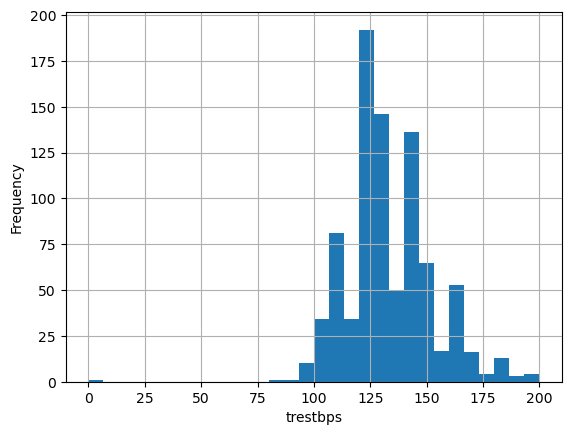

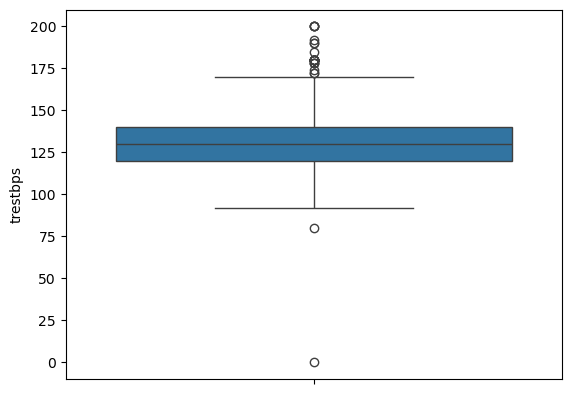

In [297]:
# plotting histogram
# trestbps
uci_data['trestbps'].hist(bins=30)
# Label the axes
plt.xlabel('trestbps')
plt.ylabel('Frequency')
plt.show()
sns.boxplot(y=uci_data['trestbps'])
plt.show()

Filling NA values in trestbps column with median because it has outliers

In [299]:
uci_data['trestbps'] = uci_data['trestbps'].fillna(uci_data['trestbps'].median())

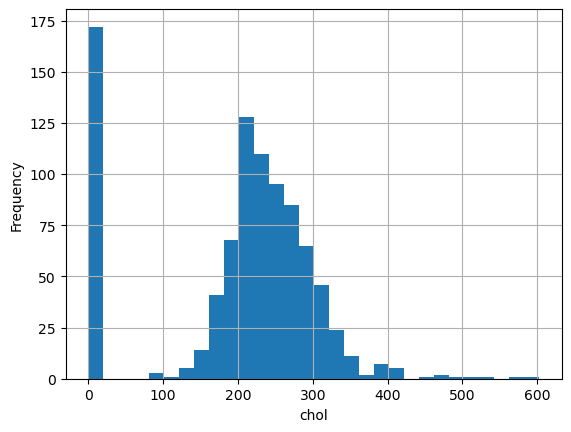

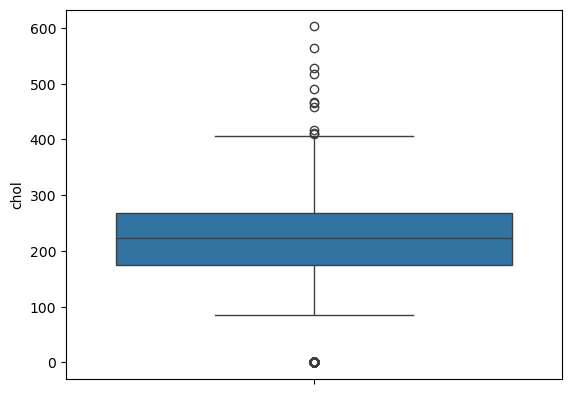

In [300]:
# chol
uci_data['chol'].hist(bins=30)
# Label the axes
plt.xlabel('chol')
plt.ylabel('Frequency')
plt.show()
sns.boxplot(y=uci_data['chol'])
plt.show()

In [301]:
uci_data['chol'] = uci_data['chol'].fillna(uci_data['chol'].median())

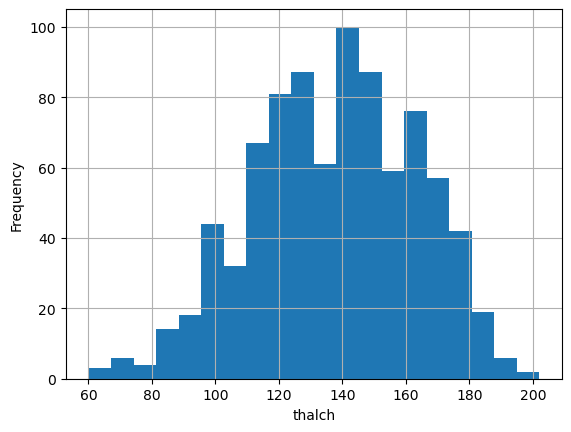

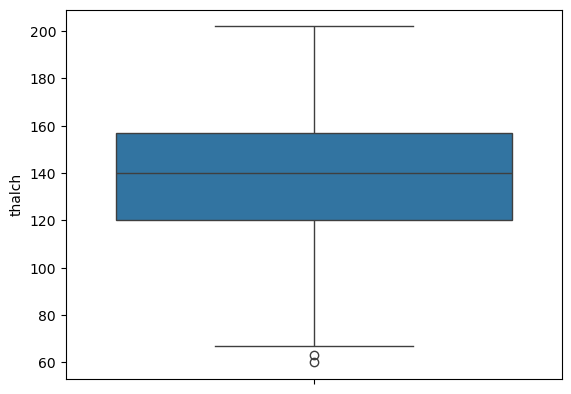

In [302]:
# thalch
uci_data['thalch'].hist(bins=20)
# Label the axes
plt.xlabel('thalch')
plt.ylabel('Frequency')
plt.show()
sns.boxplot(y=uci_data['thalch'])
plt.show()

In [303]:
uci_data['thalch'] = uci_data['thalch'].fillna(uci_data['thalch'].mean())

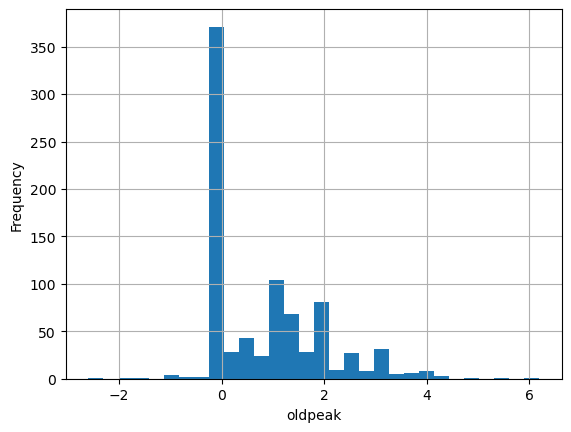

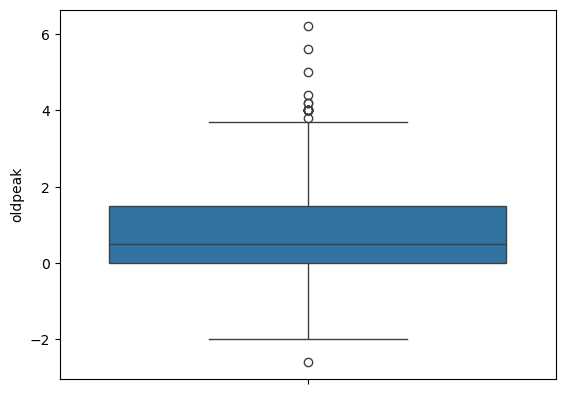

In [304]:
# oldpeak
uci_data['oldpeak'].hist(bins=30)
# Label the axes
plt.xlabel('oldpeak')
plt.ylabel('Frequency')
plt.show()
sns.boxplot(y=uci_data['oldpeak'])
plt.show()

In [305]:
uci_data['oldpeak'] = uci_data['oldpeak'].fillna(uci_data['oldpeak'].median())

In [306]:
uci_data.head(15)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,0
5,6,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,0
6,7,62,Female,Cleveland,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,3
7,8,57,Female,Cleveland,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,0
8,9,63,Male,Cleveland,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,2
9,10,53,Male,Cleveland,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,1


In [307]:
# null percentage for every column
null_percent_per_column = (uci_data.isnull().sum()/len(uci_data))*100
null_percent_per_column

id          0.0
age         0.0
sex         0.0
dataset     0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalch      0.0
exang       0.0
oldpeak     0.0
num         0.0
dtype: float64

In [308]:
uci_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    bool   
 8   restecg   920 non-null    object 
 9   thalch    920 non-null    float64
 10  exang     920 non-null    bool   
 11  oldpeak   920 non-null    float64
 12  num       920 non-null    int64  
dtypes: bool(2), float64(4), int64(3), object(4)
memory usage: 81.0+ KB


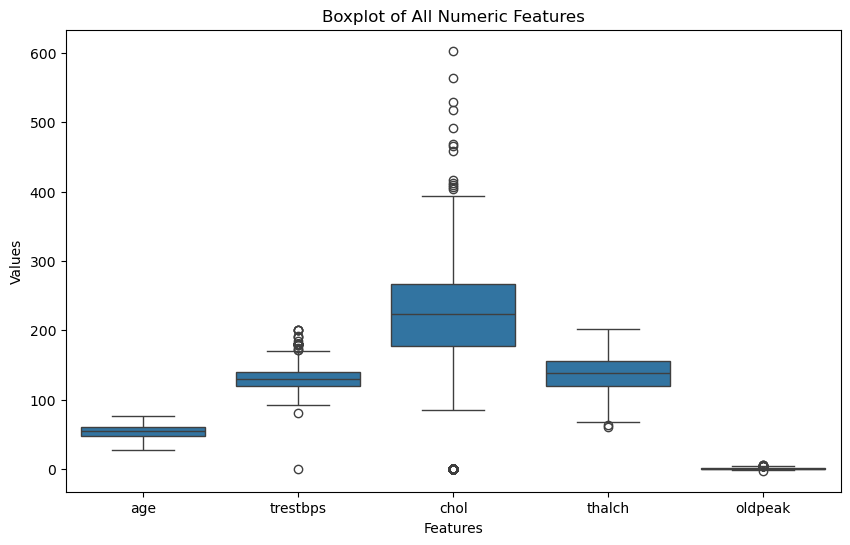

In [309]:
continuous_columns = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
# Melt the dataframe to reshape it for the boxplot
uci_data_melted = uci_data[continuous_columns].melt(var_name='Features', value_name='Values')

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Features', y='Values', data=uci_data_melted)
plt.title('Boxplot of All Numeric Features')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

__Summary of Boxplots__
The dataset reveals that most patients are aged 50-80 years, with some outliers in resting blood pressure and cholesterol levels, indicating higher heart disease risk. Maximum heart rate remains within a consistent range for most patients, while lower Oldpeak values suggest reduced coronary artery disease (CAD) risk.

In [311]:
#checking for duplicates
#count of  duplicates
uci_data.duplicated().sum()

0

In [312]:
uci_data.describe()

,id,age,trestbps,chol,thalch,oldpeak,num
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,460.500000,53.510870,131.995652,199.908696,137.545665,0.853261,0.995652
std,265.725422,9.424685,18.451300,109.040171,25.138494,1.058049,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,230.750000,47.000000,120.000000,177.750000,120.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,138.000000,0.500000,1.000000
75%,690.250000,60.000000,140.000000,267.000000,156.000000,1.500000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


__We reverted the imputation with mean, median & mode for our Anomaly Detection and Association Rules and decided to proceed with KNN imputation which is covered in <filename__

#### Univariate analysis

In [315]:
uci_data.head(5)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,0


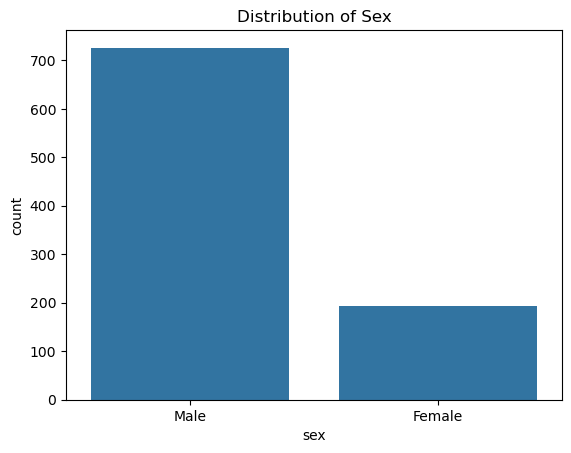

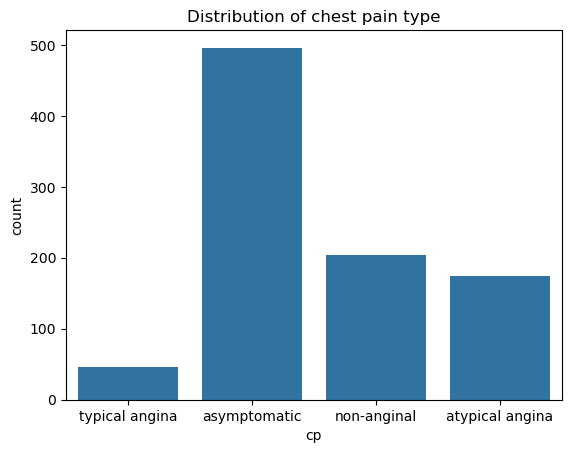

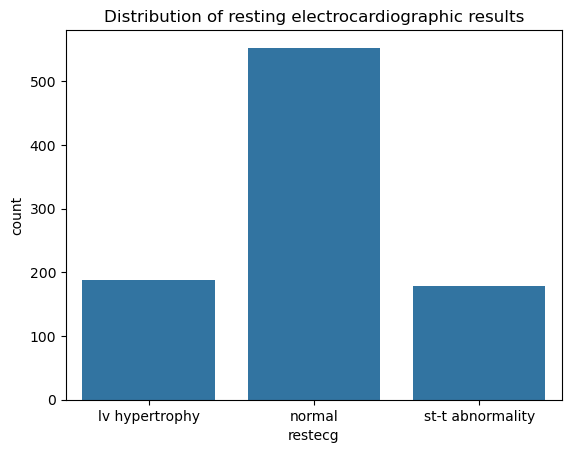

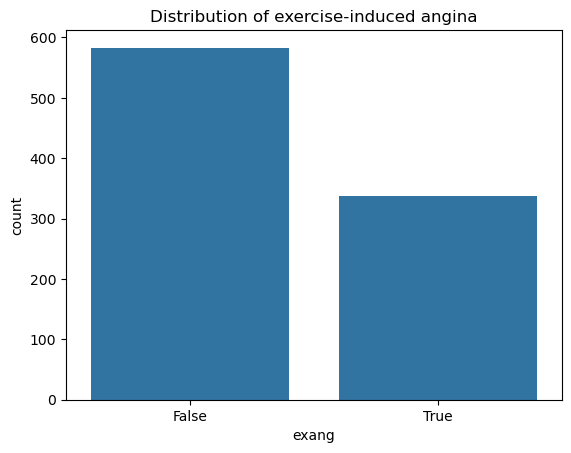

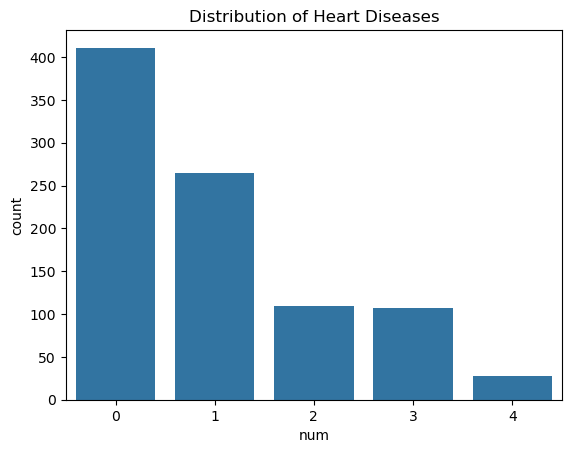

In [316]:
# categorical fields
# Distribution of Sex
sns.countplot(x='sex', data=uci_data)
plt.title('Distribution of Sex')
plt.show()
# Distribution of chest pain type
sns.countplot(x='cp', data=uci_data)
plt.title('Distribution of chest pain type')
plt.show()
# Distribution of resting electrocardiographic results
sns.countplot(x='restecg', data=uci_data)
plt.title('Distribution of resting electrocardiographic results')
plt.show()
# Distribution of resting exercise-induced angina
sns.countplot(x='exang', data=uci_data)
plt.title('Distribution of exercise-induced angina')
plt.show()
# Distribution of Heart Diseases
sns.countplot(x='num', data=uci_data)
plt.title('Distribution of Heart Diseases')
plt.show()

- __Distribution of Sex:__ This visualization gives the count of male and female patients. It gives an idea that the data is biased more towards the male patients.
- __Distribution of chest pain type:__ The distribution of chest pain type indicates that there are more people suffering from asymptomatic chest pain compared to other chest pain types. To better understand the insight, it’s worthwhile mentioning the meaning of these chest pain types.
•	Typical angina: Chest pain induced when heart muscle doesn’t receive enough oxygen
•	Asymptomatic: Silent heart attack
•	Non anginal: Chest pain without any heart disease
•	Atypical angina: Feels like heaviness under breastbone. Since asymptomatic chest pain might lead to heart attack, it’s most critical category among all types of chest pain
- __Distribution of exercise-induced angina__ The interpretation here is that a larger number of people didn’t experience angina as compared to people who experienced it due to exercise. So, it shows that exercise induced angina is less common in this dataset.

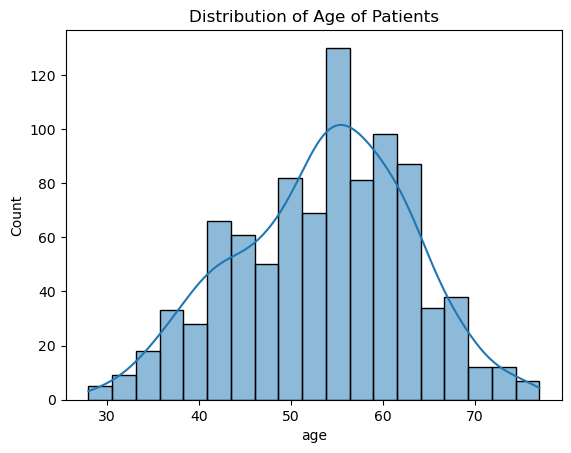

In [318]:
# numeric distributions
# Distribution of Age
sns.histplot(uci_data['age'], kde=True)
plt.title('Distribution of Age of Patients')
plt.show()

Most people suffer from heart disease in the age from 40-70 years.

#### Outlier detection

In [321]:
uci_data.head(5)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,0


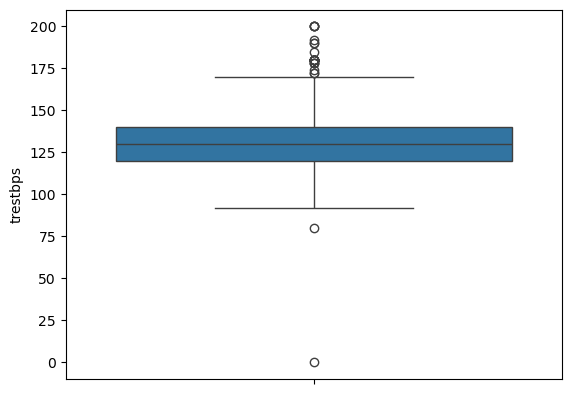

In [322]:
# boxplot for trestbps
sns.boxplot(y=uci_data['trestbps'])
plt.show()

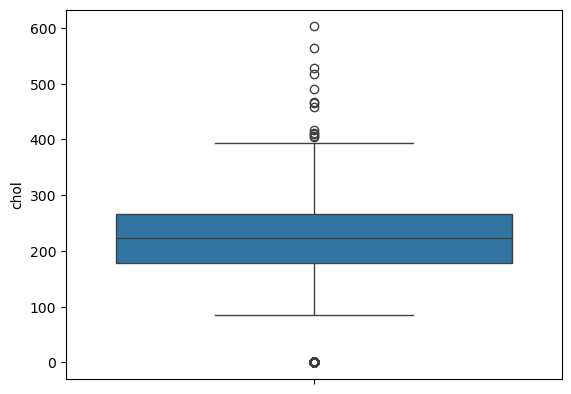

In [323]:
# boxplot for cholestrol
sns.boxplot(y=uci_data['chol'])
plt.show()

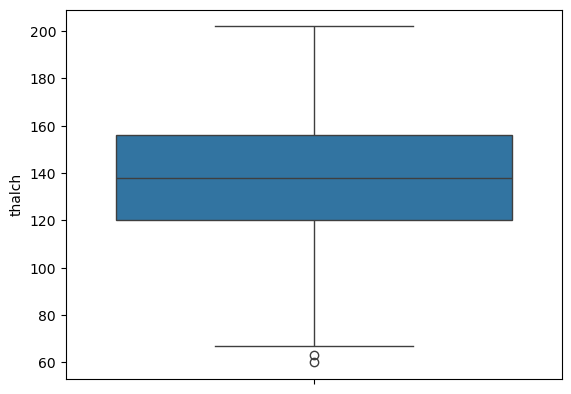

In [324]:
# boxplot for thalch
sns.boxplot(y=uci_data['thalch'])
plt.show()

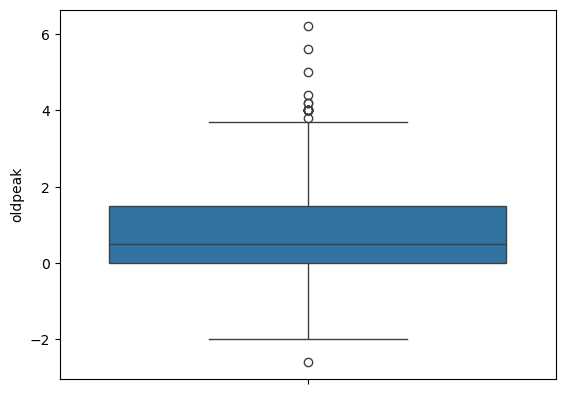

In [325]:
# boxplot for oldpeak
sns.boxplot(y=uci_data['oldpeak'])
plt.show()

#### Bivariate analysis

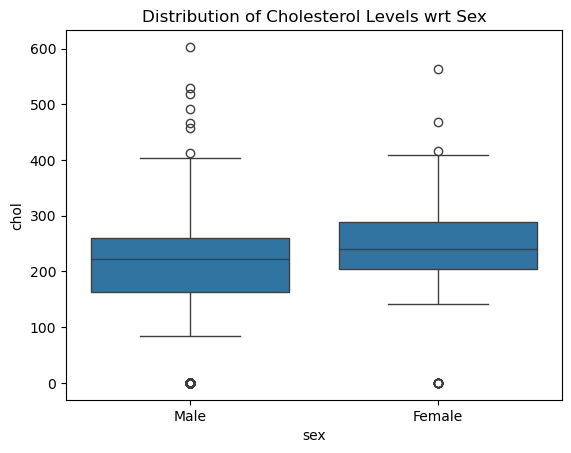

In [327]:
# Plot of Distribution of Cholesterol Levels wrt Sex
sns.boxplot(x='sex', y='chol', data=uci_data)
plt.title('Distribution of Cholesterol Levels wrt Sex')
plt.show()

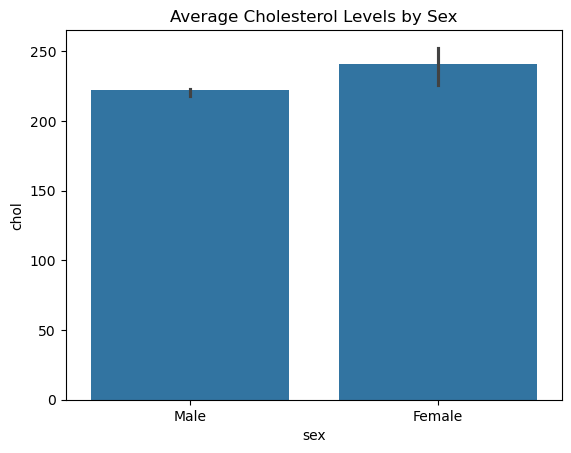

In [328]:
# Plot of Average Cholesterol Levels by Sex
sns.barplot(x='sex', y='chol', data=uci_data, estimator='median')
plt.title('Average Cholesterol Levels by Sex')
plt.show()

Female patients tend to have higher average cholestrol levels compared to male patients

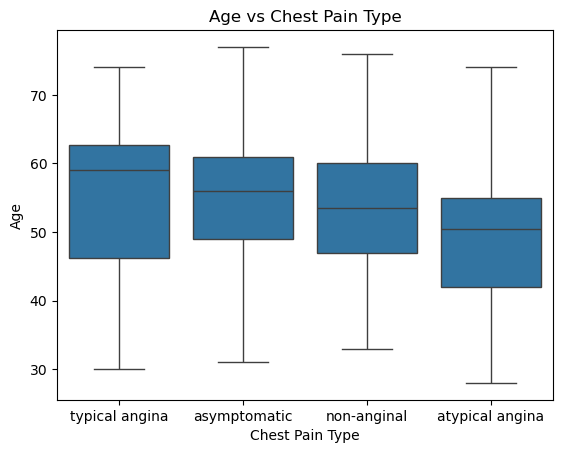

In [330]:
# age vs chest pain type
sns.boxplot(x='cp', y='age', data=uci_data)
plt.title('Age vs Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Age')
plt.show()

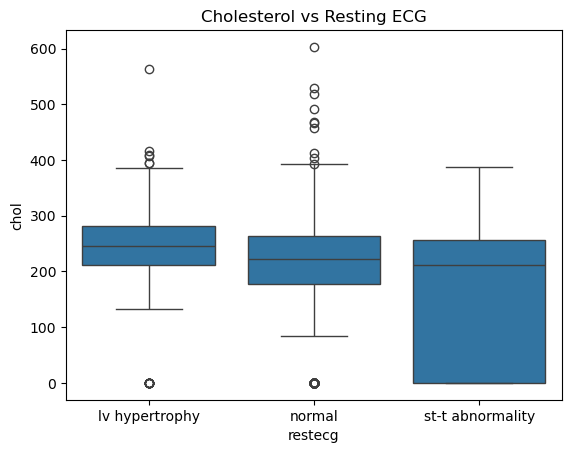

In [331]:
# Cholesterol vs Resting ECG
sns.boxplot(x='restecg', y='chol', data=uci_data)
plt.title('Cholesterol vs Resting ECG')
plt.show()

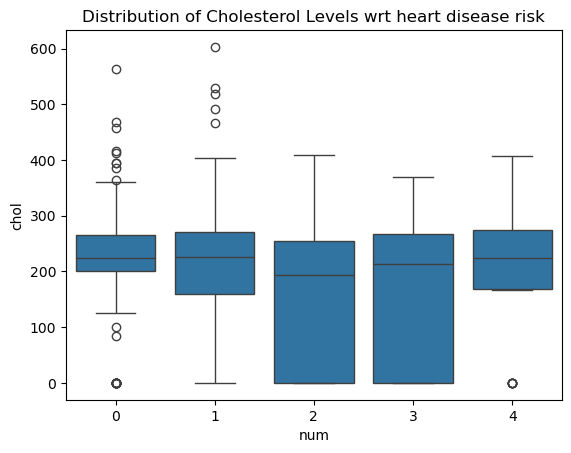

In [332]:
# Distribution of Cholesterol Levels wrt heart disease risk
sns.boxplot(x='num', y='chol', data=uci_data)
plt.title('Distribution of Cholesterol Levels wrt heart disease risk')
plt.show()

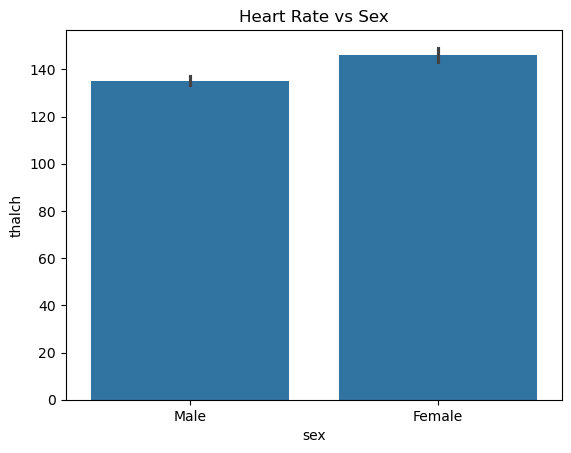

In [333]:
# Heart Rate vs Sex
sns.barplot(x='sex', y='thalch', data=uci_data)
plt.title('Heart Rate vs Sex')
plt.show()

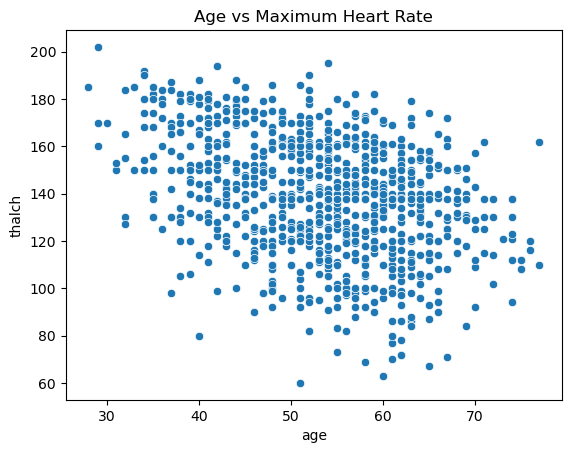

In [334]:
# Age vs Maximum Heart Rate
sns.scatterplot(x='age', y='thalch', data=uci_data)
plt.title('Age vs Maximum Heart Rate')
plt.show()

#### Multivariate Analysis

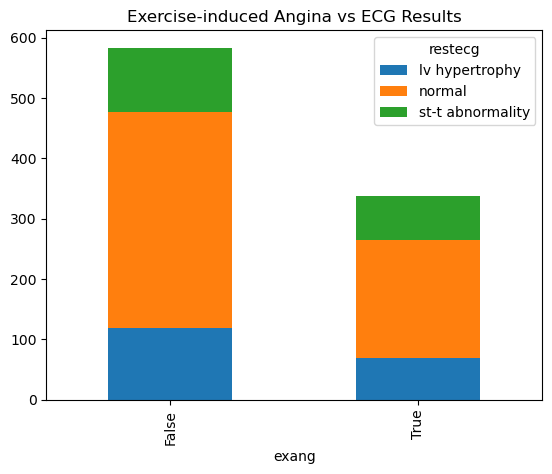

In [336]:
# Plot of Exercise-induced Angina vs ECG Results
crosstab = pd.crosstab(uci_data['exang'], uci_data['restecg'])
crosstab.plot(kind='bar', stacked=True)
plt.title('Exercise-induced Angina vs ECG Results')
plt.show()

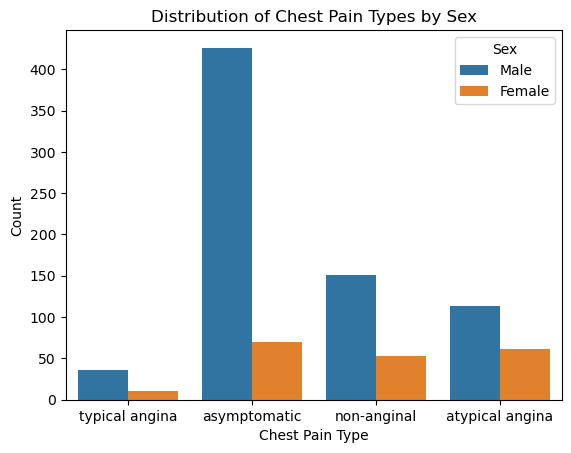

In [337]:
# sex vs chest pain type
sns.countplot(x='cp', hue='sex', data=uci_data)
plt.title('Distribution of Chest Pain Types by Sex')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.show()

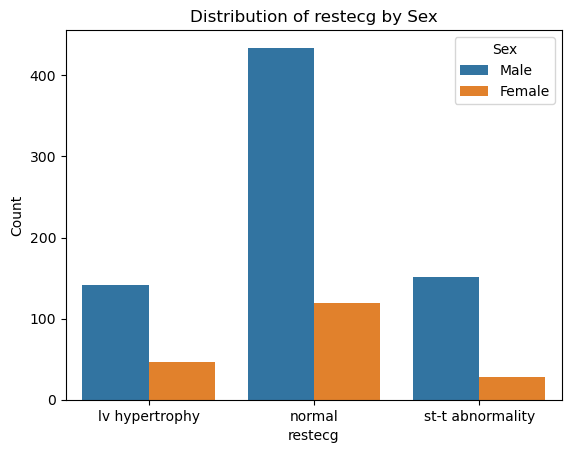

In [338]:
# sex vs restecg
sns.countplot(x='restecg', hue='sex', data=uci_data)
plt.title('Distribution of restecg by Sex')
plt.xlabel('restecg')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.show()

This insight shows out of total ECG tests done, there is almost 12.5 % of females who suffer from LV hypertrophy and somewhat lesser than 12.5% females also suffer from St-t abnormality. 
The data also shows that there are almost 37.5% males suffering from LV hypertrophy and st-t abnormality. 

LV Hypertrophy: It results in thickening of left ventricle walls. It results in weakening of heart and less efficient pumping by heart.

St-t abnormality: It relates to the abnormality seen in ST and T Wave on an ECG and is an early indication of coronary artery disease and cardiac damage.


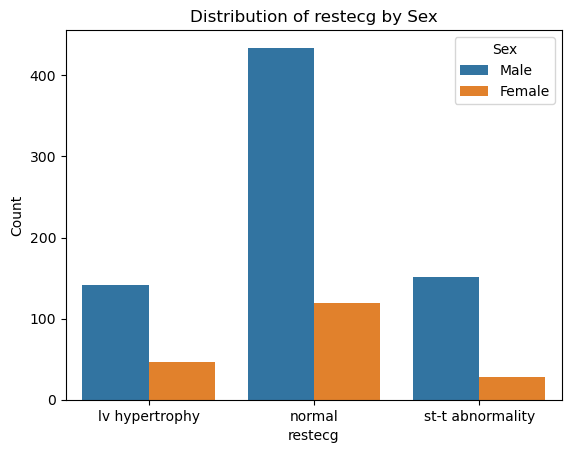

In [340]:
# sex vs restecg
sns.countplot(x='restecg', hue='sex', data=uci_data)
plt.title('Distribution of restecg by Sex')
plt.xlabel('restecg')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.show()

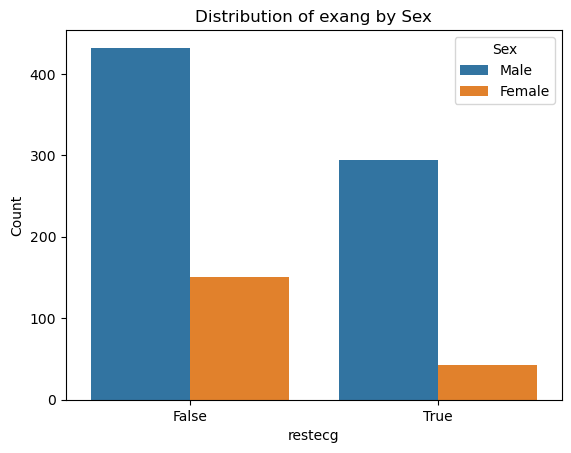

In [341]:
# sex vs exercise induced angina
sns.countplot(x='exang', hue='sex', data=uci_data)
plt.title('Distribution of exang by Sex')
plt.xlabel('restecg')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.show()

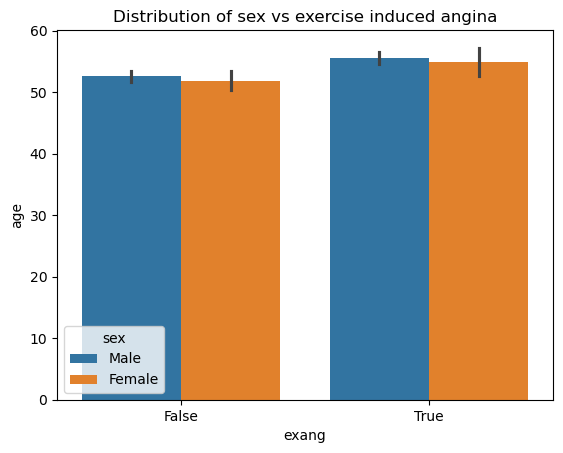

In [342]:
# sex vs exercise induced angina
# Distribution of sex vs exercise induced angina
sns.barplot(x='exang', y='age', hue='sex', data=uci_data)
plt.title('Distribution of sex vs exercise induced angina')
plt.show()

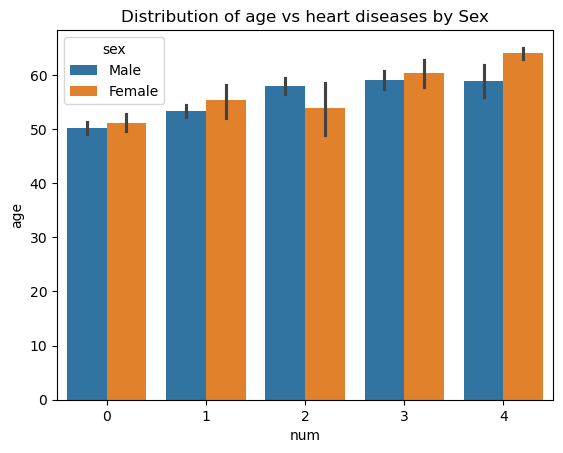

In [343]:
# Distribution of sex vs heart diseases
sns.barplot(x='num', y='age', hue='sex', data=uci_data)
plt.title('Distribution of age vs heart diseases by Sex')
plt.show()

The number of heart diseases is more in females as compared to males in older age.

In [345]:
# numerical data
numeric_uci_data = uci_data[['age', 'trestbps', 'chol', 'thalch', 'oldpeak']]

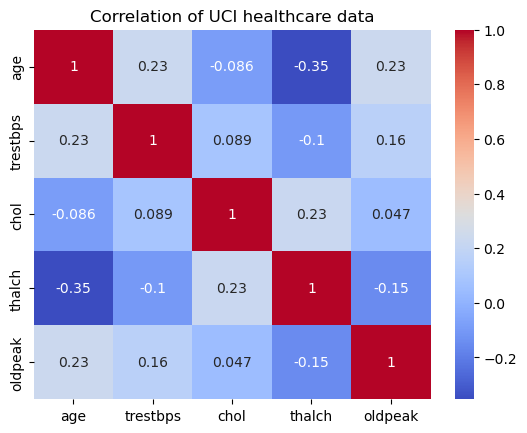

In [346]:
# correlation heatmap
correlation = numeric_uci_data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation of UCI healthcare data')
plt.show()

There is no correlation among numeric values. So, it helps in doing clustering efficiently.